Mengimpor Modul

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Mengunduh dataset menggunakan kredensial kaggle

In [2]:
!chmod 600 /content/kaggle.json

In [3]:
!KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d arashnic/book-recommendation-dataset

 21% 5.00M/23.8M [00:00<00:01, 10.6MB/s]
100% 23.8M/23.8M [00:00<00:00, 44.0MB/s]


Ekstrak Zip Dataset

In [4]:
import zipfile, os
local_zip = '/content/book-recommendation-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/Books Recommendation')
zip_ref.close()

Gunakan dataframe Books dan Ratings

In [5]:
book = pd.read_csv('/content/Books Recommendation/Books.csv')
rating = pd.read_csv('/content/Books Recommendation/Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Melihat ukuran kedua dataframe

In [6]:
book.shape

(271360, 8)

In [7]:
rating.shape

(1149780, 3)

Melihat info kedua dataframe

In [8]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [26]:
book = book.rename(columns={'Book-Title': 'title','Book-Author':'author', 'Year-Of-Publication' : 'year'})

In [43]:
print('Banyak buku: ', len(book.title.unique()))
print('Tahun Terbit: ', book.year.unique())

Banyak buku:  9553
Tahun Terbit:  [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955]


In [15]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [38]:
rating = rating.rename(columns={'Book-Rating': 'rating','User-ID':'user_id'})

In [42]:
print('Banyak data: ', len(rating.user_id.unique()))
print('Angka Rating: ', rating.rating.unique())

Banyak data:  679
Angka Rating:  [ 0  5  3  6  8  7 10  9  4  1  2]


# Data Prepocessing

Mengambil 10000 data di book dan 5000 di rating, karena data terlalu banyak

In [44]:
book = book[:10000]
rating = rating[:5000]

Melihat id buku mana yang mendapat rate 10

In [46]:
rating[rating.rating == max(rating.rating)]
best_id = rating.ISBN[rating.rating == max(rating.rating)]
best_id = list(dict.fromkeys(best_id))

Judul buku mana yang mendapat rating 10

In [48]:
best_books = []
for i in best_id:
    books_name = book.title[book.ISBN == i]
    best_books.append(books_name)

In [49]:
best_books

[Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 5731    The Watsons Go to Birmingham - 1963 (Yearling ...
 Name: title, dtype: object,
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 8271    Auf Ehre und Gewissen. Roman.
 Name: title, dtype: object,
 5732    Im Angesicht des Feindes.
 Name: title, dtype: object,
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 Series([], Name: title, dtype: object),
 

In [50]:
len(best_books)

300

# Content Based Filtering

## Data Preparation

Mendrop seluruh kolom yang mengandung Na/Null di book dan Rating

In [53]:
book = book.dropna()
rating = rating.dropna()

Mengdrop baris yang menduplikasi baris yang lain agar data tidak tumpang tindih dan tidak berulang-ulang

In [54]:
book = book.drop_duplicates()
rating = rating.drop_duplicates()

In [55]:
book.head()

,ISBN,title,author,year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Mengubah dataframe book menjadi list

In [57]:
book_ISBN = book['ISBN'].tolist()

book_title = book['title'].tolist()

book_author = book['author'].tolist()

book_year_of_publication = book['year'].tolist()

Buat dictionary untuk menentukan key value dari list yang telah kita buat

In [60]:
new_book = pd.DataFrame({
    'book_ISBN': book_ISBN,
    'book_title': book_title,
    'book_author': book_author,
    'book_year_of_publication': book_year_of_publication
})
new_book

,book_ISBN,book_title,book_author,book_year_of_publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999
...,...,...,...,...
9995,0380730774,Read This and Tell Me What It Says : Stories (...,A. Manette Ansay,1998
9996,0862418879,The Star Rover,Jack London,2000
9997,340414645X,Die Keltennadel.,Patrick Dunne,2001
9998,3442730988,Tod in der Datscha.,Anna Malyschewa,2003


## Modelling

Modelling menggunakan fungsi tfidfvectorizer() dari library sklearn.

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(new_book['book_author']) 
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron',
 'aarsen',
 'abbey',
 'abbott',
 'abby',
 'abelar',
 'abraham',
 'abrahams',
 'abzug',
 'achebe',
 'ackerman',
 'ackroyd',
 'ad',
 'adam',
 'adamo',
 'adams',
 'adamson',
 'addis',
 'adele',
 'adeline',
 'adie',
 'adkins',
 'adler',
 'adrian',
 'adriana',
 'adrienne',
 'africa',
 'agatha',
 'agnes',
 'aguiar',
 'agustã',
 'agut',
 'ahdaf',
 'ahlberg',
 'ahne',
 'aidan',
 'aiden',
 'aiken',
 'aileen',
 'aimee',
 'ainslie',
 'akiba',
 'al',
 'alain',
 'alan',
 'alatas',
 'alba',
 'albanese',
 'albano',
 'albert',
 'alberts',
 'albom',
 'albright',
 'alcock',
 'alcorn',
 'alcott',
 'aldiss',
 'aldous',
 'aldrich',
 'aldrin',
 'alec',
 'aleister',
 'alejandro',
 'alejo',
 'aleksandr',
 'aleramo',
 'alers',
 'alesia',
 'alessandra',
 'alessandro',
 'alex',
 'alexa',
 'alexander',
 'alexandra',
 'alexandre',
 'alfie',
 'alfonsi',
 'alford',
 'alfred',
 'ali',
 'alice',
 'alicia',
 'alien',
 'alighieri',
 'alisa',
 'alison',
 'alistair',
 'alix',
 'aljean',
 'allan',
 'allen',
 'all

Lakukan fit transformasi dalam bentuk matriks

In [63]:
tfidf_matrix = tf.fit_transform(new_book['book_author']) 
 
tfidf_matrix.shape 

(10000, 5575)

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, gunakan fungsi todense()

In [64]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=new_book.book_title
).sample(10, axis=1,replace=True).sample(10, axis=0)

,farrer,knaak,merlin,arrabal,griesemer,bridwell,hosseini,hillenbrand,anahis,gertrude
book_title,,,,,,,,,,
"The Golden Compass (His Dark Materials, Book 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Runaway Ralph (Cleary Reissue),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Circle of Three #3: Second Sight (Circle of Three),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Child of the Light (Child of the Light),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LITTLE WOMEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Joy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Dilbert Bunch: A Dilbert Book (Main Street Editions),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vampires Don't Wear Polka Dots (Adventures of the Bailey School Kids (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SCREAM OF THE CAT (PHANTOM VALLEY ) : SCREAM OF THE CAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Hitung derajat kesamaan (similarity degree) antar buku dengan teknik cosine similarity. Di sini, kita menggunakan fungsi cosine_similarity dari library sklearn

In [67]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Buat dataframe cosine dengan kolom dan baris merupakan judul buku

In [68]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=new_book['book_title'], columns=new_book['book_title'])

Membuat fungsi 5 rekomendasi teratas berdasarkan item

In [69]:
def author_recommendations(i, M, items, k=5):
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    closest = M.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [70]:
new_book

,book_ISBN,book_title,book_author,book_year_of_publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999
...,...,...,...,...
9995,0380730774,Read This and Tell Me What It Says : Stories (...,A. Manette Ansay,1998
9996,0862418879,The Star Rover,Jack London,2000
9997,340414645X,Die Keltennadel.,Patrick Dunne,2001
9998,3442730988,Tod in der Datscha.,Anna Malyschewa,2003


Membuat item buku yang sudah dibaca agar dapat membuat rekomendasi berdasarkan item tersebut.


In [78]:
item_book = 'The Star Rover'
new_book[new_book.book_title.eq(item_book)]

,book_ISBN,book_title,book_author,book_year_of_publication
9996,0862418879,The Star Rover,Jack London,2000


Membuat rekomendasi berdasarkan item_books

In [79]:
recommendations = author_recommendations(item_book, cosine_sim_df, new_book[['book_title', 'book_author']])

In [80]:
recommendations = recommendations.drop_duplicates()

In [81]:
recommendations

,book_title,book_author
0,Call of the Wild,Jack London
1,White Fang,Jack London
2,The Call of the Wild: And Selected Stories (Si...,Jack London
3,"The Diary of Jack the Ripper/the Discovery, th...",Jack
4,What Memories Remain,Cait London


## Evaluasi

Menggunakan matriks akurasi

In [83]:
books_that_have_been_read_row = book[book.title == item_book]
books_that_have_been_read_author = books_that_have_been_read_row.iloc[0]["author"]

In [84]:
book_recommendation_authors = recommendations.book_author

In [85]:
real_author = 0
for i in range(5):
    if book_recommendation_authors[i] == books_that_have_been_read_author:
        real_author+=1

In [86]:
Accuracy = real_author/5*100
print("Accuracy of the model is {}%".format(Accuracy))

Accuracy of the model is 60.0%


# Collaborative Filter

## Data Preparation

Encoding kolom user_id menjadi integer

In [88]:
user_ids = rating['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

encoded userID :  {276725: 0, 276726: 1, 276727: 2, 276729: 3, 276733: 4, 276736: 5, 276737: 6, 276744: 7, 276745: 8, 276746: 9, 276747: 10, 276748: 11, 276751: 12, 276754: 13, 276755: 14, 276760: 15, 276762: 16, 276765: 17, 276768: 18, 276772: 19, 276774: 20, 276780: 21, 276786: 22, 276788: 23, 276796: 24, 276798: 25, 276800: 26, 276803: 27, 276804: 28, 276806: 29, 276808: 30, 276811: 31, 276812: 32, 276813: 33, 276814: 34, 276817: 35, 276820: 36, 276822: 37, 276827: 38, 276828: 39, 276830: 40, 276832: 41, 276833: 42, 276835: 43, 276837: 44, 276838: 45, 276840: 46, 276842: 47, 276847: 48, 276848: 49, 276850: 50, 276852: 51, 276853: 52, 276854: 53, 276856: 54, 276857: 55, 276859: 56, 276861: 57, 276862: 58, 276863: 59, 276866: 60, 276869: 61, 276870: 62, 276872: 63, 276873: 64, 276875: 65, 276878: 66, 276879: 67, 276884: 68, 276887: 69, 276888: 70, 276889: 71, 276890: 72, 276896: 73, 276904: 74, 276905: 75, 276911: 76, 276912: 77, 276915: 78, 276916: 79, 276925: 80, 276927: 81, 276928:

Encoding kolom ISBN menjadi integer

In [90]:
book_ids = rating['ISBN'].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
print('encoded ISBN: ', book_to_book_encoded)
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}
print('encoded angka ke ISBN: ', book_encoded_to_book)

rating['user'] = rating['user_id'].map(user_to_user_encoded)
rating['book'] = rating['ISBN'].map(book_to_book_encoded)

encoded ISBN:  {'034545104X': 0, '0155061224': 1, '0446520802': 2, '052165615X': 3, '0521795028': 4, '2080674722': 5, '3257224281': 6, '0600570967': 7, '038550120X': 8, '342310538': 9, '0425115801': 10, '0449006522': 11, '0553561618': 12, '055356451X': 13, '0786013990': 14, '0786014512': 15, '0060517794': 16, '0451192001': 17, '0609801279': 18, '0671537458': 19, '0679776818': 20, '0943066433': 21, '1570231028': 22, '1885408226': 23, '0747558167': 24, '3442437407': 25, '033390804X': 26, '3596218098': 27, '0684867621': 28, '0451166892': 29, '8440682697': 30, '034544003X': 31, '0380000059': 32, '0380711524': 33, '0451167317': 34, '0451454952': 35, '0843920262': 36, '3404122879': 37, '3404182928': 38, '3404611306': 39, '342662429': 40, '3426690179': 41, '3442424216': 42, '3442425573': 43, '3453092007': 44, '3453157745': 45, '3453176944': 46, '3453185137': 47, '3453185323': 48, '3453213025': 49, '3453877241': 50, '3492226604': 51, '3517017442': 52, '3596125006': 53, 'B0000BLD7X': 54, 'N3453

Cek beberapa hal dalam data seperti jumlah user, jumlah jumlah buku, dan mengubah nilai rating menjadi float.

In [91]:
num_users = len(user_encoded_to_user)
print(num_users)
num_book = len(book_encoded_to_book)
print(num_book)
rating['rating'] = rating['rating'].values.astype(np.float32)

min_rating = min(rating['rating'])
max_rating = max(rating['rating'])
 
print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

679
4688
Number of User: 679, Number of Book: 4688, Min Rating: 0.0, Max Rating: 10.0


## Train-Test-Split

Acak terlebih dahulu data

In [92]:
rating = rating.sample(frac=1, random_state=42)
rating

,user_id,ISBN,rating,user,book
1501,277427,0201000822,10.0,255,1470
2586,277639,0453008739,0.0,335,2487
2653,277639,0671509144,0.0,335,2550
1055,277187,0553281089,0.0,170,1041
705,276964,0886774829,8.0,96,696
...,...,...,...,...,...
4426,278418,0061091464,0.0,678,4127
466,276925,3775713328,0.0,80,461
3092,277928,0937247065,7.0,476,2935
3772,278159,0385318073,5.0,574,3549


Selanjutnya bagi data training menjadi 70% serta data test menjadi 30%

In [94]:
x = rating[['user', 'book']].values
 
y = rating['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.70 * rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 255 1470]
 [ 335 2487]
 [ 335 2550]
 ...
 [ 476 2935]
 [ 574 3549]
 [ 139  850]] [1.  0.  0.  ... 0.7 0.5 0.5]


## Modelling

Mengimpor modul

In [95]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

Di sini, saya membuat class RecommenderNet dengan keras Model class.

In [96]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.book_embedding = layers.Embedding( 
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    book_vector = self.book_embedding(inputs[:, 1])
    book_bias = self.book_bias(inputs[:, 1]) 
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) 

Lakukan Kompilasi terhadap model

In [97]:
model = RecommenderNet(num_users, num_book, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Melakukan Training

In [98]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 5,
    epochs = 20,
    validation_data = (x_val, y_val)
)

Epoch 1/20
700/700 [==============================] - 7s 4ms/step - loss: 0.6681 - root_mean_squared_error: 0.4216 - val_loss: 0.6459 - val_root_mean_squared_error: 0.4125
Epoch 2/20
700/700 [==============================] - 2s 3ms/step - loss: 0.5773 - root_mean_squared_error: 0.3674 - val_loss: 0.6170 - val_root_mean_squared_error: 0.3955
Epoch 3/20
700/700 [==============================] - 3s 4ms/step - loss: 0.5315 - root_mean_squared_error: 0.3441 - val_loss: 0.6016 - val_root_mean_squared_error: 0.3867
Epoch 4/20
700/700 [==============================] - 2s 3ms/step - loss: 0.5079 - root_mean_squared_error: 0.3292 - val_loss: 0.5872 - val_root_mean_squared_error: 0.3789
Epoch 5/20
700/700 [==============================] - 3s 4ms/step - loss: 0.4847 - root_mean_squared_error: 0.3154 - val_loss: 0.5752 - val_root_mean_squared_error: 0.3727
Epoch 6/20
700/700 [==============================] - 2s 3ms/step - loss: 0.4658 - root_mean_squared_error: 0.3037 - val_loss: 0.5653 - val_

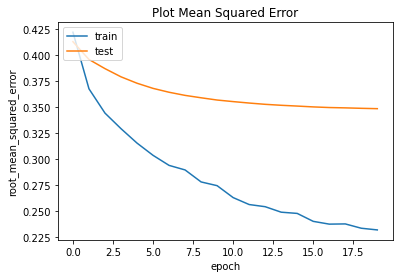

In [99]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Plot Mean Squared Error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan rekomendasi

Definisikan kembali dataset book dan rating

In [109]:
book =  new_book
rating = rating

Ambil user_id secara acak pada dataset rating, lalu cek untuk mengetahui buku yang telah dibaca dan yang belum dibaca sehingga rekomendasinya nanti berisi buku-buku yang belum pernah dibaca sebelumnya

In [110]:
user_id = rating.user_id.sample(1).iloc[0]
books_have_been_read_by_user = rating[rating.user_id == user_id]
 
books_have_not_been_read_by_user = book[book['book_ISBN'].isin(books_have_been_read_by_user.ISBN.values)]['book_ISBN'] 
books_have_not_been_read_by_user = list(
    set(books_have_not_been_read_by_user)
    .intersection(set(book_to_book_encoded.keys()))
)
 
books_have_not_been_read_by_user = [[book_to_book_encoded.get(x)] for x in books_have_not_been_read_by_user]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(books_have_not_been_read_by_user), books_have_not_been_read_by_user)
)


In [111]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(books_have_not_been_read_by_user[x][0]) for x in top_ratings_indices
]
 
top_books_recommended = (
    books_have_been_read_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
books_row = book[book['book_ISBN'].isin(top_books_recommended)]
for row in books_row.itertuples():
    print(row.book_title, ':', row.book_author)
 
print('----' * 8)
print('Top 10 Book Recommendation for user: {}'.format(user_id))
print('----' * 8)
 
recommended_books = book[book['book_ISBN'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row.book_title, ':', row.book_author)

Politically Correct Bedtime Stories: Modern Tales for Our Life and Times : James Finn Garner
--------------------------------
Top 10 Book Recommendation for user: 277427
--------------------------------
If Only It Were True : Marc Levy
Bel Canto: A Novel : Ann Patchett
Move Your Stuff, Change Your Life : How to Use Feng Shui to Get Love, Money, Respect and Happiness : Karen Rauch Carter
The Cardinal of the Kremlin (Jack Ryan Novels) : Tom Clancy
House of Leaves : Mark Z. Danielewski
Heaven and Earth (Three Sisters Island Trilogy) : Nora Roberts
Where the Red Fern Grows : Wilson Rawls
Gone for Good : HARLAN COBEN
The Red Badge of Courage : Stephen Crane
Toujours Provence (Vintage Departures) : Peter Mayle
